In [28]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 

In [29]:
df = pd.read_csv('./data/diem_thi_thpt_2024.csv')
df.head(10)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,6.75,8.0,6.00,5.25,5.0,NaN,NaN,NaN,N1
1,1000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1
2,1000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1
3,1000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1
4,1000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1
5,1000006,5.8,8.75,7.8,NaN,NaN,NaN,7.75,6.75,7.50,N1
6,1000007,6.0,7.50,NaN,NaN,NaN,NaN,6.75,7.00,7.00,NaN
7,1000008,8.2,9.00,9.0,NaN,NaN,NaN,8.00,8.25,10.00,N1
8,1000009,8.2,8.00,8.6,8.25,4.25,6.0,NaN,NaN,NaN,N1
9,1000010,7.4,9.00,9.6,NaN,NaN,NaN,8.25,6.50,8.25,N1


# Câu 1: Thống kê mô tả (8 điểm, CLO 1)

In [40]:
# a Bộ dữ liệu gồm những cột nào?
col = df.columns
# Kiểu dữ liệu của từng cột trong bộ dữ liệu là gì?
dl = df.info()
# Có bao nhiêu giá trị bị thiếu trong mỗi cột?
missing = df.isnull().sum()
# Phân phối của các giá trị trong từng cột như thế nào? (ví dụ: điểm trung bình, điểm cao nhất, điểm thấp nhất)
pp = df.describe()

print(f'Bộ dữ liệu gồm những cột nào? {col}')
print('----------------')
print(f'\nKiểu dữ liệu của từng cột trong bộ dữ liệu là gì? {dl}')
print('----------------')
print(f'\nCó bao nhiêu giá trị bị thiếu trong mỗi cột? {missing}')
print('----------------')
pp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061605 entries, 0 to 1061604
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   sbd           1061605 non-null  int64  
 1   toan          1045613 non-null  float64
 2   ngu_van       1050101 non-null  float64
 3   ngoai_ngu     912705 non-null   float64
 4   vat_li        345615 non-null   float64
 5   hoa_hoc       346518 non-null   float64
 6   sinh_hoc      342378 non-null   float64
 7   lich_su       706214 non-null   float64
 8   dia_li        704682 non-null   float64
 9   gdcd          583609 non-null   float64
 10  ma_ngoai_ngu  912705 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 89.1+ MB
Bộ dữ liệu gồm những cột nào? Index(['sbd', 'toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc',
       'lich_su', 'dia_li', 'gdcd', 'ma_ngoai_ngu'],
      dtype='object')
----------------

Kiểu dữ liệu của từng cột trong bộ dữ

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
count,1.061605e+06,1.045613e+06,1.050101e+06,912705.000000,345615.000000,346518.00000,342378.000000,706214.000000,704682.000000,583609.000000
mean,2.734354e+07,6.447309e+00,7.231146e+00,5.521938,6.666866,6.68083,6.284079,6.570343,7.193541,8.156503
std,1.919442e+07,1.556900e+00,1.330057e+00,1.880657,1.631129,1.64147,1.244849,1.462804,1.283945,1.042644
min,1.000001e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,9.006324e+06,5.400000e+00,6.500000e+00,4.000000,5.500000,5.50000,5.500000,5.500000,6.500000,7.500000
50%,2.800794e+07,6.800000e+00,7.500000e+00,5.200000,7.000000,6.75000,6.250000,6.500000,7.250000,8.250000
75%,4.400492e+07,7.600000e+00,8.250000e+00,7.000000,8.000000,8.00000,7.250000,7.500000,8.000000,9.000000
max,6.400729e+07,9.800000e+00,1.000000e+01,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000


In [50]:

# Lọc ra các thí sinh có điểm 3 môn theo khối A (Toán, Lý, Hóa) >= 18 điểm.
df_khoi_A = df.dropna(subset=['toan','vat_li','hoa_hoc'])
df['diem_khoi_A'] = df_khoi_A['toan'] + df_khoi_A['vat_li'] + df_khoi_A['hoa_hoc']
df_khoi_A = df_khoi_A[df_khoi_A['diem_khoi_A'] >= 18]
df_khoi_A


,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,tong_diem_24,diem_khoi_A
0,1000001,8.4,6.75,8.0,6.00,5.25,5.00,NaN,NaN,NaN,N1,NaN,19.65
8,1000009,8.2,8.00,8.6,8.25,4.25,6.00,NaN,NaN,NaN,N1,NaN,20.70
10,1000011,7.2,8.50,9.0,7.75,6.75,6.25,NaN,NaN,NaN,N1,NaN,21.70
16,1000017,7.0,8.75,7.8,3.75,7.50,7.25,NaN,NaN,NaN,N1,NaN,18.25
17,1000018,8.2,6.00,9.0,7.75,6.75,6.75,NaN,NaN,NaN,N1,NaN,22.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061582,64007264,8.0,7.75,5.0,7.75,7.75,6.75,NaN,NaN,NaN,N1,NaN,23.50
1061585,64007267,8.4,8.00,6.0,7.75,8.00,7.75,NaN,NaN,NaN,N1,NaN,24.15
1061589,64007271,7.8,6.50,5.2,7.50,7.00,5.75,NaN,NaN,NaN,N1,NaN,22.30
1061590,64007272,6.8,7.25,5.8,6.25,7.25,7.00,NaN,NaN,NaN,N1,NaN,20.30


In [ ]:
# cc. Lọc thí sinh có ít nhất một môn đạt điểm 10
df_diem_10 = df[(df[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 
                      'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']] == 10).any(axis=1)]

# Số lượng thí sinh có ít nhất một môn đạt điểm 10
df_diem_10

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,tong_diem_24,diem_khoi_A
7,1000008,8.2,9.00,9.0,NaN,NaN,NaN,8.00,8.25,10.00,N1,NaN,NaN
118,1000119,7.8,9.50,10.0,NaN,NaN,NaN,7.50,9.00,9.00,N1,NaN,NaN
301,1000304,8.8,9.00,10.0,NaN,NaN,NaN,9.75,9.25,9.25,N1,NaN,NaN
530,1000536,8.6,9.25,10.0,NaN,NaN,NaN,7.75,8.50,8.50,N1,NaN,NaN
608,1000614,8.0,9.00,8.8,NaN,NaN,NaN,8.00,10.00,8.75,N1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061112,64006793,6.6,7.50,4.6,NaN,NaN,NaN,9.25,9.50,10.00,N1,NaN,NaN
1061233,64006915,5.0,8.00,6.2,NaN,NaN,NaN,9.00,10.00,8.75,N1,NaN,NaN
1061258,64006940,5.2,8.50,5.6,NaN,NaN,NaN,9.25,10.00,9.00,N1,NaN,NaN
1061373,64007055,7.8,8.25,7.0,NaN,NaN,NaN,9.75,9.50,10.00,N1,NaN,NaN


In [53]:
#c. Lọc thí sinh có ít nhất một môn đạt điểm 1
df_diem_1 = df[(df[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 
                      'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']] <= 1).any(axis=1)]

# Số lượng thí sinh có ít nhất một môn đạt điểm 1
df_diem_1

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,tong_diem_24,diem_khoi_A
3225,1003254,8.2,0.00,NaN,8.75,8.75,0.0,NaN,NaN,NaN,NaN,NaN,25.70
5131,1005187,7.6,NaN,NaN,7.75,7.25,0.0,NaN,NaN,NaN,NaN,NaN,22.60
7020,1007103,5.8,7.25,1.0,NaN,NaN,NaN,6.25,5.50,6.75,N1,NaN,NaN
13823,1013947,5.2,7.00,0.0,NaN,NaN,NaN,7.50,6.50,7.25,N1,NaN,NaN
16654,1016821,7.4,5.00,5.8,1.00,7.75,8.0,NaN,NaN,NaN,N1,NaN,16.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056958,64002622,4.0,7.50,1.0,NaN,NaN,NaN,5.00,5.50,6.50,N1,NaN,NaN
1057264,64002928,4.6,6.75,7.8,0.50,6.75,6.0,NaN,NaN,NaN,N1,NaN,11.85
1057778,64003443,3.0,6.00,0.8,NaN,NaN,NaN,4.50,6.75,5.50,N1,NaN,NaN
1058038,64003704,4.2,5.75,0.4,NaN,NaN,NaN,4.50,6.25,6.50,N1,NaN,NaN


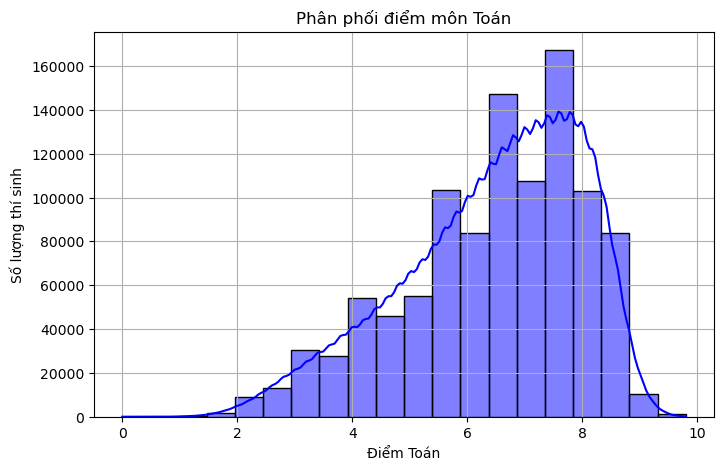

In [54]:
# d. (2 điểm) Trực quan hóa dữ liệu đã cho
# Biểu đồ phân phối điểm của từng môn học.
# Biểu đồ phân phối điểm môn Toán
plt.figure(figsize=(8, 5))
sns.histplot(df['toan'].dropna(), bins=20, kde=True, color='blue')
plt.xlabel('Điểm Toán')
plt.ylabel('Số lượng thí sinh')
plt.title('Phân phối điểm môn Toán')
plt.grid(True)
plt.show()


# Câu 2: Mô phỏng mẫu ngẫu nhiên (2 điểm, CLO 2)

In [56]:
# Lấy mẫu ngẫu nhiên 1000 thí sinh từ dữ liệu gốc
df_sample_1000 = df.sample(n=1000, random_state=42)

# Kiểm tra số lượng thí sinh trong mẫu
df_sample_1000.shape


(1000, 13)

In [57]:
mean_original = df[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 
                    'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']].mean()
mean_sample = df_sample_1000[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 
                              'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']].mean()

# So sánh trung bình điểm giữa dữ liệu gốc và mẫu
comparison = pd.DataFrame({'Dữ liệu gốc': mean_original, 'Mẫu 1000 thí sinh': mean_sample})
comparison

,Dữ liệu gốc,Mẫu 1000 thí sinh
toan,6.447309,6.499595
ngu_van,7.231146,7.190161
ngoai_ngu,5.521938,5.465212
vat_li,6.666866,6.659722
hoa_hoc,6.680830,6.691298
sinh_hoc,6.284079,6.402083
lich_su,6.570343,6.547544
dia_li,7.193541,7.132376
gdcd,8.156503,8.074128


In [ ]:
# Lấy mẫu ngẫu nhiên 500 thí sinh đạt điểm tổng cao nhất.
